=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

                                  ES335- Machine Learning (HAR-INSIGHT)

Creating the dataset for the project. The dataset is created by reading the data from
the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
to be used for all the modeling purposes.

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [207]:
# Library imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [208]:
# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [209]:
combined_dir = os.path.join("Combined")

In [210]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [211]:
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

In [212]:
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

In [213]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [214]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [215]:
X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

In [216]:
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

In [217]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [218]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

In [219]:
# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

In [220]:
# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

In [221]:
print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


---

**Task 1: Visual Analysis of Activity Waveforms**

Plotting the waveform data for each activity class to identify differences and similarities between the activities. This visual analysis aims to provide insights into whether the model can effectively classify activities based on the observed data patterns.

In [222]:
df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
df

,accx,accy,accz,Label
0,0.973608,-0.184475,-0.282197,5.0
1,0.976087,-0.186779,-0.284879,5.0
2,0.977865,-0.191836,-0.289169,5.0
3,0.979638,-0.191792,-0.291794,5.0
4,0.982244,-0.189156,-0.288260,5.0
...,...,...,...,...
53995,0.730058,-0.197915,-0.066743,2.0
53996,0.696212,-0.149662,-0.059822,2.0
53997,0.731536,-0.162198,-0.049890,2.0
53998,0.762215,-0.176539,-0.038009,2.0


In [223]:
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
Movement = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]

---

**Decision Trees**

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_total = []
precision_total = []
recall_total = []

depth_dtc = range(2, 9)
accuracy_dtc = []
precision_dtc = []
recall_dtc = []

X_train = X_train.reshape(108, -1)
X_test = X_test.reshape(36,-1)

print("FOR TEST DATA")
print("-----------------")
for i in range(2,9):
    dtc_i = DecisionTreeClassifier(max_depth=i,splitter='random',random_state=154)
    dtc_i = dtc_i.fit(X_train,y_train)
    y_pred = dtc_i.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1) # 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average="weighted")

    '''
    The warning occurs when your model doesn't predict certain classes, causing precision to be undefined for those classes.
    It can be the cause of imbalanced dataset.
    That is why zero_division is used such that if the value is divided by 0
    '''

    accuracy_dtc.append(accuracy * 100)
    precision_dtc.append(precision * 100)
    recall_dtc.append(recall * 100)
    print(f"Accurary for the Decision Tree with {i}th depth : {accuracy * 100:.2f}")
    print(f"Precision for the Decision Tree with {i}th depth : {precision * 100:.2f}")
    print(f"Recall for the Decision Tree with {i}th depth : {recall * 100:.2f}")
    print("------------------------------------------------------------------------")

FOR TEST DATA
-----------------
Accurary for the Decision Tree with 2th depth : 47.22
Precision for the Decision Tree with 2th depth : 84.58
Recall for the Decision Tree with 2th depth : 47.22
------------------------------------------------------------------------
Accurary for the Decision Tree with 3th depth : 61.11
Precision for the Decision Tree with 3th depth : 79.29
Recall for the Decision Tree with 3th depth : 61.11
------------------------------------------------------------------------
Accurary for the Decision Tree with 4th depth : 72.22
Precision for the Decision Tree with 4th depth : 77.14
Recall for the Decision Tree with 4th depth : 72.22
------------------------------------------------------------------------
Accurary for the Decision Tree with 5th depth : 63.89
Precision for the Decision Tree with 5th depth : 62.27
Recall for the Decision Tree with 5th depth : 63.89
------------------------------------------------------------------------
Accurary for the Decision Tree w

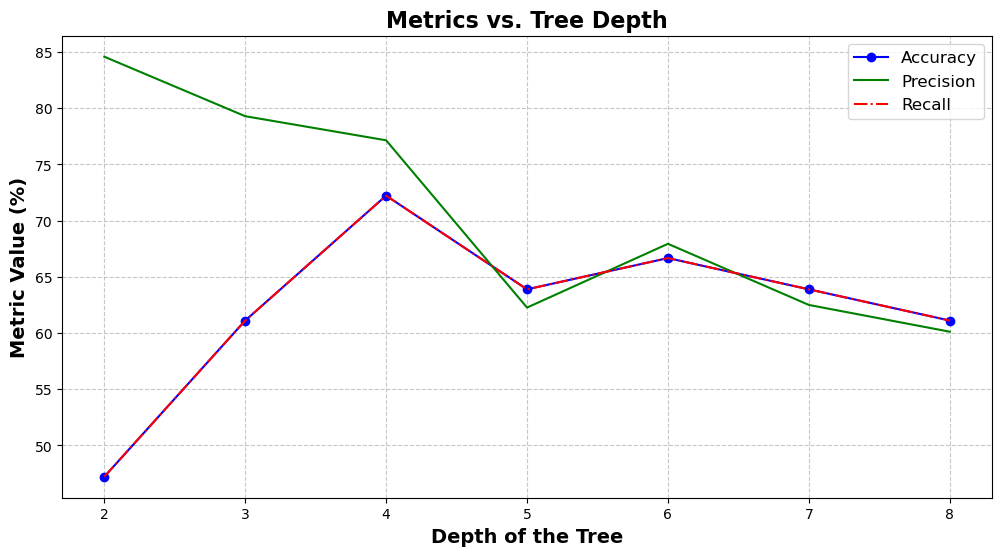

In [225]:
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(depth_dtc, accuracy_dtc, marker='o',linestyle='-', color='blue', label='Accuracy')
plt.plot(depth_dtc, precision_dtc, linestyle='-', color='green', label='Precision')
plt.plot(depth_dtc, recall_dtc, linestyle='-.', color='red', label='Recall')

# Customize the plot
plt.title("Metrics vs. Tree Depth", fontsize=16, fontweight='bold')
plt.xlabel("Depth of the Tree", fontsize=14, fontweight='bold')
plt.ylabel("Metric Value (%)", fontsize=14, fontweight='bold')
plt.xticks(depth_dtc)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

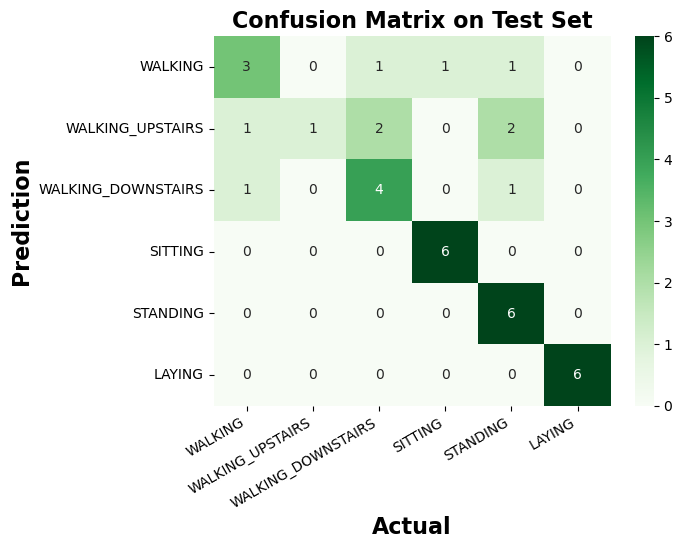

In [226]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier(random_state=154,splitter='random',max_depth=4)
dtc = dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

accuracy_for_4th_depth = accuracy_score(y_test, y_pred_dtc)
precision_for_4th_depth = precision_score(y_test, y_pred_dtc, average="weighted", zero_division=1)
recall_for_4th_depth = recall_score(y_test, y_pred_dtc, average="weighted")

accuracy_total.append(accuracy_for_4th_depth*100)
precision_total.append(precision_for_4th_depth*100)
recall_total.append(recall_for_4th_depth*100)

cm = confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(cm,annot=True, xticklabels=Movement, yticklabels=Movement, cmap="Greens")
plt.ylabel("Prediction",fontweight='bold',fontsize=16)
plt.xlabel("Actual",fontweight='bold',fontsize=16)
plt.title("Confusion Matrix on Test Set",fontweight='bold',fontsize=16)
plt.xticks(rotation=30, ha="right")
plt.show()

Why the accuracy and the recall is `same`?

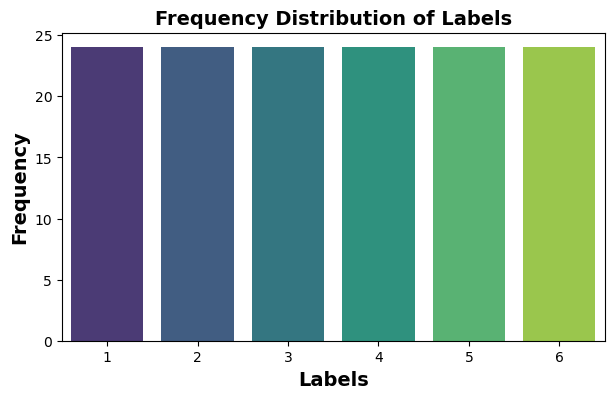

In [227]:
labels = pd.concat([pd.Series(y_train), pd.Series(y_test)])
label_counts = labels.value_counts()

# Plotting the frequency distribution
plt.figure(figsize=(7, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title("Frequency Distribution of Labels", fontsize=14,fontweight='bold')
plt.xlabel("Labels", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.show()


If recall and accuracy are the same for the Decision Tree model, it might be due to the following reasons:

`Balanced Classes`:
- *Recall measures how many of the actual positive instances were correctly identified, while accuracy considers the overall proportion of correct predictions.*
- If classes are balanced, accuracy and recall can give similar results since both metrics will reflect how well your model is performing across all classes.


---

**Random Forest Classifier** 

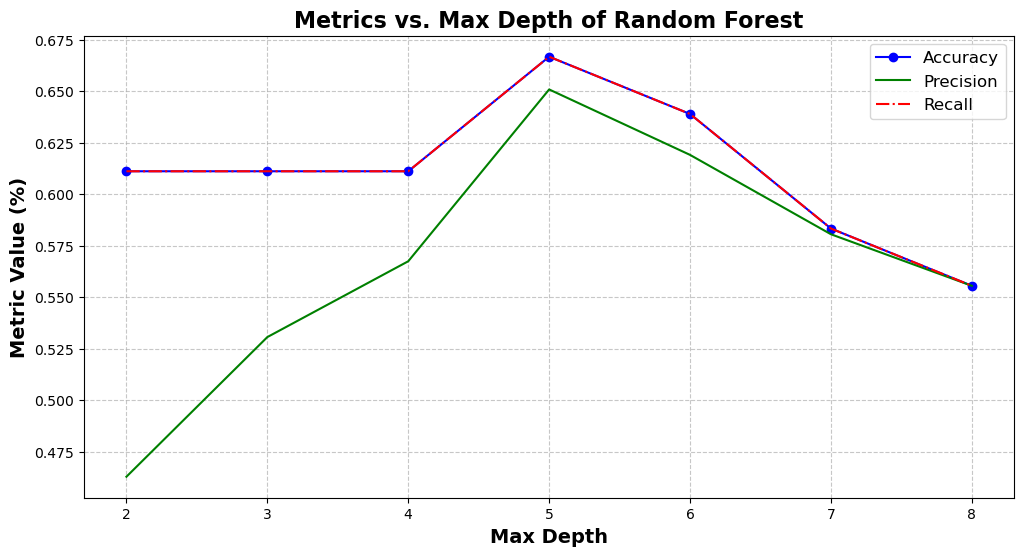

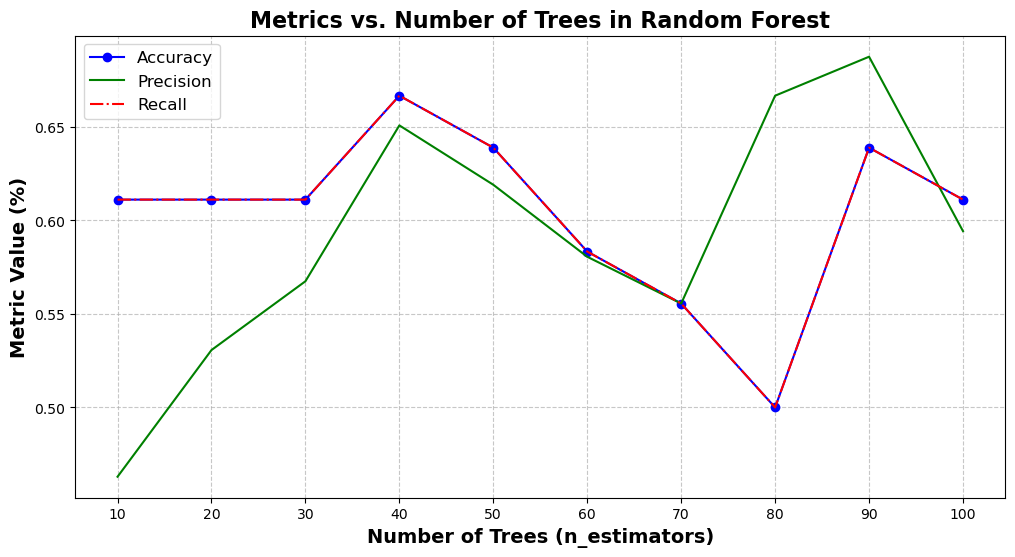

In [228]:
from sklearn.ensemble import RandomForestClassifier

metrics_rfc = {'accuracy': [], 'precision': [], 'recall': []}
n_estimators_rfc = range(10, 110, 10)
max_depths_rfc = range(2, 9)

for n in n_estimators_rfc:
    for i in max_depths_rfc:
        rfc = RandomForestClassifier(n_estimators=n, random_state=154, max_depth=i)
        rfc.fit(X_train, y_train)
        y_pred_rfc = rfc.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred_rfc)
        precision = precision_score(y_test, y_pred_rfc, average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred_rfc, average='weighted')

        # Append the metrics to their respective lists
        metrics_rfc['accuracy'].append(accuracy)
        metrics_rfc['precision'].append(precision)
        metrics_rfc['recall'].append(recall)

# Plot for the effect of max_depth
plt.figure(figsize=(12, 6))
plt.plot(max_depths_rfc, metrics_rfc['accuracy'][:len(max_depths_rfc)], marker='o', linestyle='-', color='blue', label='Accuracy')
plt.plot(max_depths_rfc, metrics_rfc['precision'][:len(max_depths_rfc)], linestyle='-', color='green', label='Precision')
plt.plot(max_depths_rfc, metrics_rfc['recall'][:len(max_depths_rfc)], linestyle='-.', color='red', label='Recall')

# Customize the plot
plt.title("Metrics vs. Max Depth of Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Max Depth", fontsize=14, fontweight='bold')
plt.ylabel("Metric Value (%)", fontsize=14, fontweight='bold')
plt.xticks(max_depths_rfc)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

# Plot for the effect of n_estimators
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_rfc, metrics_rfc['accuracy'][:len(n_estimators_rfc)], marker='o', linestyle='-', color='blue', label='Accuracy')
plt.plot(n_estimators_rfc, metrics_rfc['precision'][:len(n_estimators_rfc)], linestyle='-', color='green', label='Precision')
plt.plot(n_estimators_rfc, metrics_rfc['recall'][:len(n_estimators_rfc)], linestyle='-.', color='red', label='Recall')

# Customize the plot
plt.title("Metrics vs. Number of Trees in Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Number of Trees (n_estimators)", fontsize=14, fontweight='bold')
plt.ylabel("Metric Value (%)", fontsize=14, fontweight='bold')
plt.xticks(n_estimators_rfc)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


Accuracy on test data: 75.0 %
Precision on test data: 74.8015873015873 %
Accuracy on test data: 75.0 %


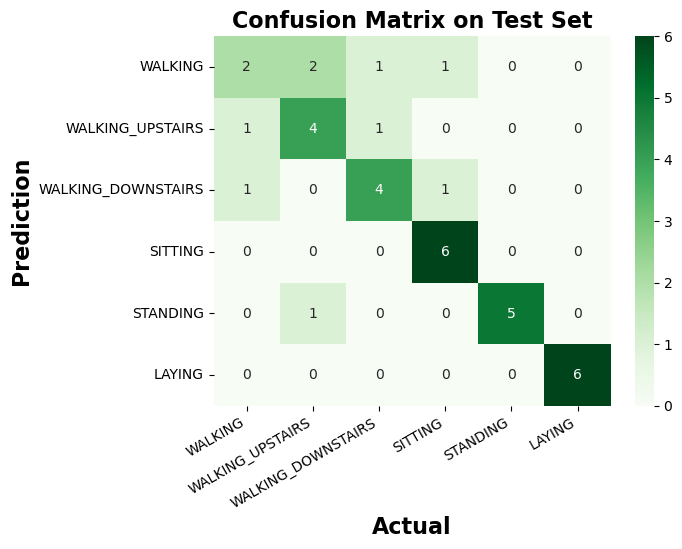

In [229]:
rfc = RandomForestClassifier(random_state=155, max_depth=5, n_estimators=40)
rfc = rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

accuracy_for_5th_depth = accuracy_score(y_test, y_pred_rfc)
precision_for_5th_depth = precision_score(y_test, y_pred_rfc, average='weighted', zero_division=1)
recall_for_5th_depth = recall_score(y_test, y_pred_rfc, average='weighted')

print("Accuracy on test data:", accuracy_for_5th_depth *100, "%")
print("Precision on test data:", precision_for_5th_depth *100, "%")
print("Accuracy on test data:", recall_for_5th_depth *100, "%")

accuracy_total.append(accuracy_for_5th_depth*100)
precision_total.append(precision_for_5th_depth*100)
recall_total.append(recall_for_5th_depth*100)


cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, xticklabels=Movement, yticklabels=Movement, cmap="Greens")
plt.ylabel("Prediction", fontweight='bold', fontsize=16)
plt.xlabel("Actual", fontweight='bold', fontsize=16)
plt.title("Confusion Matrix on Test Set", fontweight='bold', fontsize=16)
plt.xticks(rotation=30, ha="right")
plt.show()

---

**Support Vector Machine**

In [230]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', random_state=154)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average="weighted", zero_division=1)
recall_svm = recall_score(y_test, y_pred, average="weighted")

accuracy_total.append(accuracy_svm*100)
precision_total.append(precision_svm*100)
recall_total.append(recall_svm*100)

print(f"Accuracy: {accuracy_svm * 100:.2f}")
print(f"Precision: {precision_svm * 100:.2f}")
print(f"Recall: {recall_svm * 100:.2f}")

Accuracy: 63.89
Precision: 65.00
Recall: 63.89


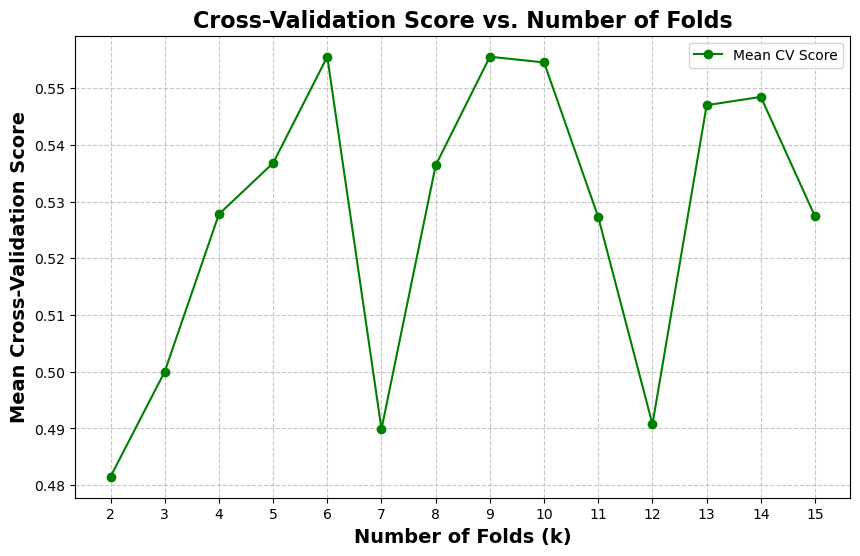

In [231]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_classifier = SVC(kernel='rbf', random_state=42)
cv_mean_scores = []

for i in range(2, 16):
    cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=i)
    cv_mean_scores.append(np.mean(cv_scores))

# Plotting the mean cross-validation scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(2, 16), cv_mean_scores, marker='o', linestyle='-', color='g', label='Mean CV Score')
plt.title('Cross-Validation Score vs. Number of Folds', fontsize=16, fontweight='bold')
plt.xlabel('Number of Folds (k)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Cross-Validation Score', fontsize=14, fontweight='bold')
plt.xticks(range(2, 16))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


---

**Logistic Regression**

 Logistic Regression is sensitive to the scale of the features. It's recommended to scale the features using techniques like Standardization (scaling features to have zero mean and unit variance) or Normalization (scaling features to a fixed range, like [0, 1]).


In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_classifier = LogisticRegression(random_state=154, max_iter=10000)
log_reg_classifier.fit(X_train_scaled, y_train)
y_pred = log_reg_classifier.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred, average="weighted", zero_division=1) # 'weighted' for multi-class
recall_log = recall_score(y_test, y_pred, average="weighted")

accuracy_total.append(accuracy_log*100)
precision_total.append(precision_log*100)
recall_total.append(recall_log*100)

print(f"Accuracy: {accuracy_log * 100:.2f}")
print(f"Precision: {precision_log * 100:.2f}")
print(f"Recall: {recall_log * 100:.2f}")

Accuracy: 52.78
Precision: 80.29
Recall: 52.78


---

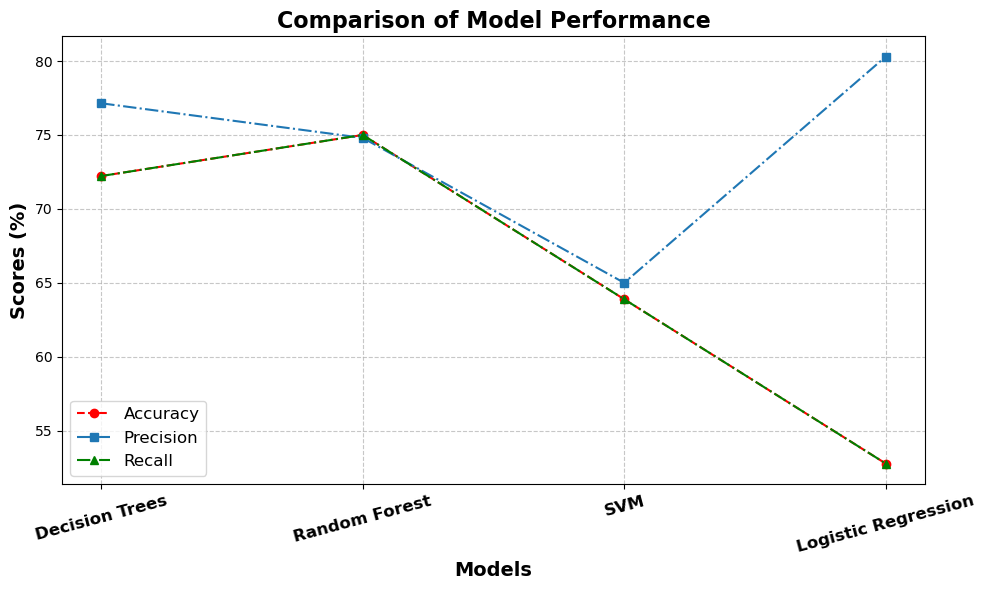

In [233]:
models = ['Decision Trees','Random Forest', 'SVM','Logistic Regression']
x = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.plot(x, accuracy_total, marker='o', label='Accuracy', linestyle='--',color='r')
plt.plot(x, precision_total, marker='s', label='Precision', linestyle='-.')
plt.plot(x, recall_total, marker='^', label='Recall', linestyle='-.',color='g')

# Customizing the x-axis
plt.xticks(x, models, rotation=15, fontsize=12, fontweight='bold')  # Setting model names
plt.xlabel('Models', fontsize=14, fontweight='bold')

# Adding labels and legend
plt.ylabel('Scores (%)', fontsize=14, fontweight='bold')
plt.title('Comparison of Model Performance', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Determine whether SVM or Random Forest would perform better for your classification task with 6 categories, several factors must be considered.

**Key Characteristics of Dataset**<br>
- Dataset Size: `54,000 rows × 4 columns`<br>
- SVMs tend to struggle with very large datasets due to computational complexity, especially when using kernels like RBF.<br>
- Random Forest is generally better suited for larger datasets because it can handle large-scale data efficiently.<br>
  
**Number of Features**: `4`<br>
- With a small number of features, SVM can be effective as it focuses on finding the best decision boundary in high-dimensional spaces.
- Random Forest's advantage of handling high-dimensional data is less pronounced here.